In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

In [2]:
def is_in_subspace(vector,matrix):
    ns=sc.linalg.null_space(matrix.todense())
    
    coeff=vector.dot(ns)
    ns_dim=coeff.shape
    
    vector_hat=np.zeros(ns.shape[0])

    for i in range(ns.shape[1]):
        vector_hat+=coeff[i]*ns[:,i]
    
    error=np.sum(np.abs(vector-vector_hat))
    
    return error, vector_hat, coeff, ns_dim

## Two cliques no hole

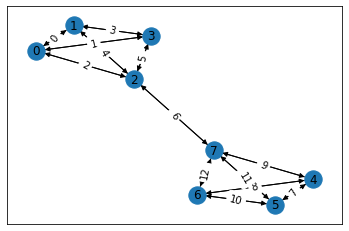

In [21]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=0)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=1)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc = SimplicialComplex(graph=G, no_faces=False)

pos = nx.spring_layout(G,)

plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G.to_directed(), pos=pos)#, edge_color=e[:,i],width=2, edge_vmin=-np.pi, edge_vmax=np.pi)


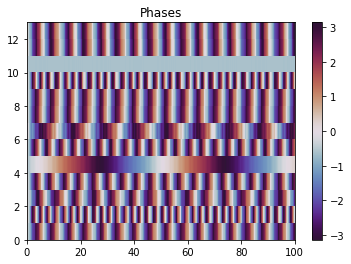

In [4]:
np.random.seed(42)
initial_phase = np.random.random(Gsc.n_edges)

t_max = 100
n_t = 1000
alpha_1 = np.pi/4.
alpha_2 = np.pi/4.#-0.2

edge_result = integrate_edge_kuramoto(
    Gsc, initial_phase, t_max, n_t, alpha_1=alpha_1, alpha_2=alpha_2
)
plot_edge_kuramoto(edge_result)

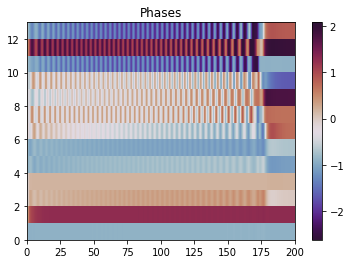

In [4]:
np.random.seed(42)
initial_phase = np.random.random(Gsc.n_edges)

t_max = 200
n_t = 5000
alpha_1 = 0.05
alpha_2 = np.pi/2.+0.2

edge_result = integrate_edge_kuramoto(
    Gsc, initial_phase, t_max, n_t, alpha_1=alpha_1, alpha_2=alpha_2
)
plot_edge_kuramoto(edge_result)

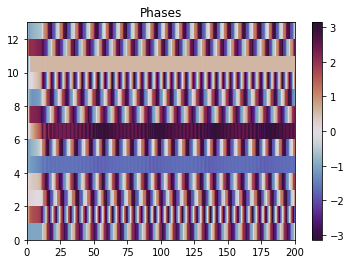

In [5]:
np.random.seed(42)
initial_phase = np.random.random(Gsc.n_edges)

t_max = 200
n_t = 5000
alpha_1 = 0.05
alpha_2 = np.pi/2 + 0.4

edge_result = integrate_edge_kuramoto(
    Gsc, initial_phase, t_max, n_t, alpha_1=alpha_1, alpha_2=alpha_2
)
plot_edge_kuramoto(edge_result)

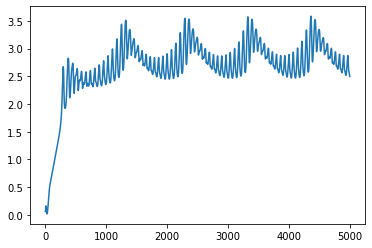

In [10]:
plt.figure()
plt.plot((edge_result.y[6].T))
#for i in range(9):
#    plt.axhline(-np.pi*i)

<ipython-input-14-37bb82becb1f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


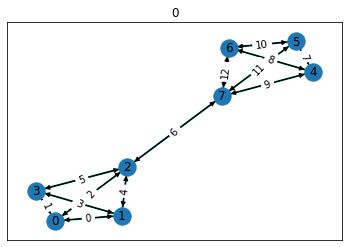

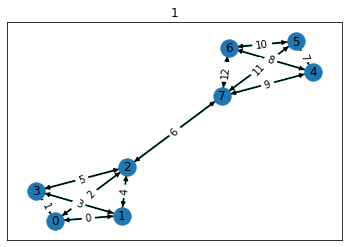

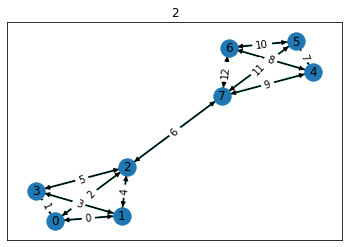

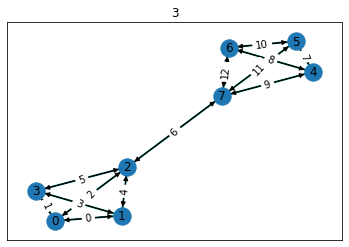

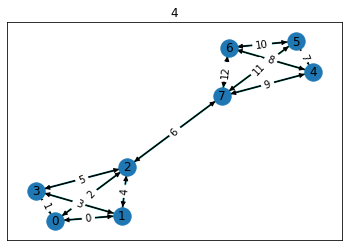

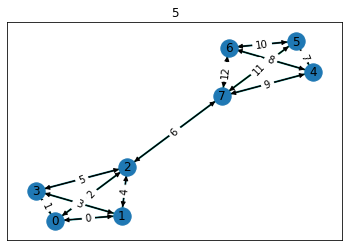

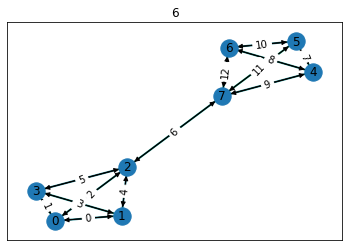

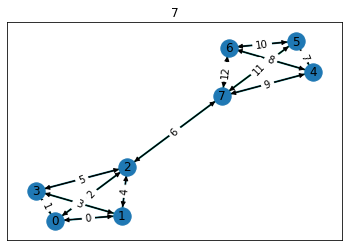

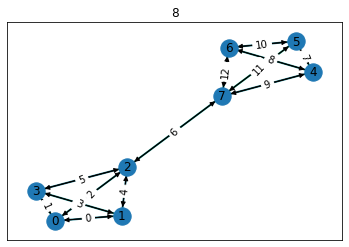

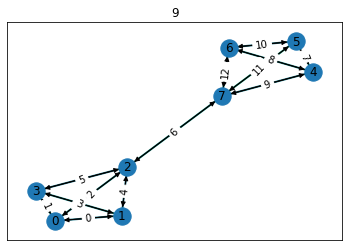

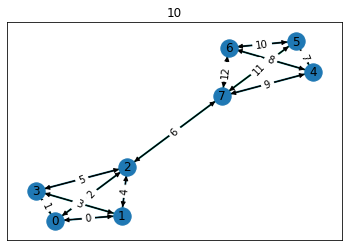

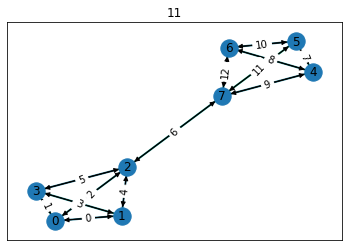

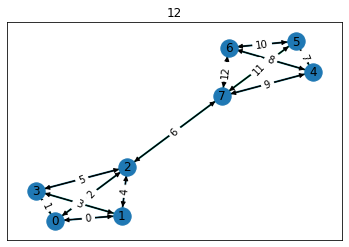

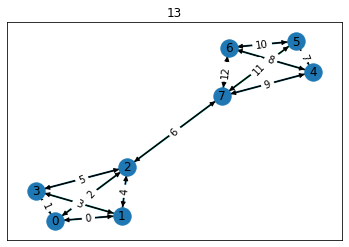

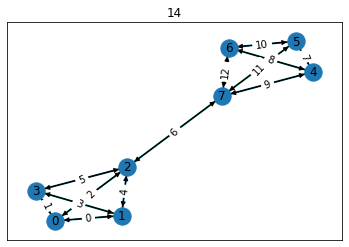

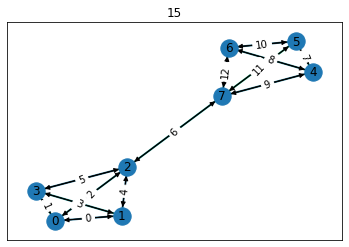

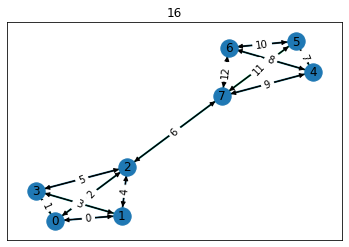

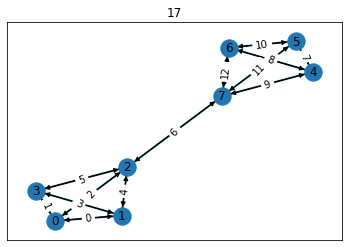

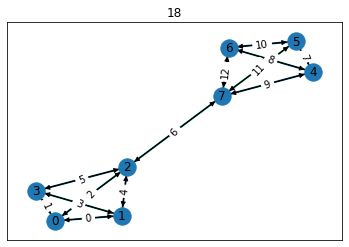

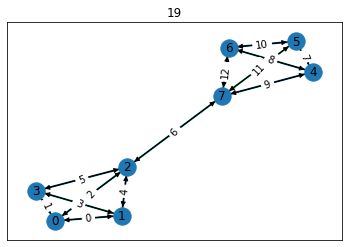

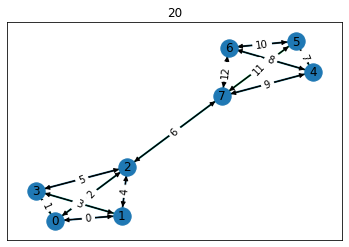

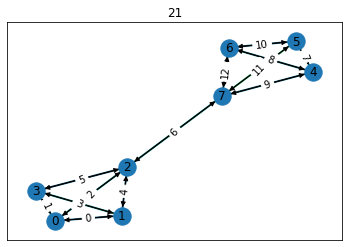

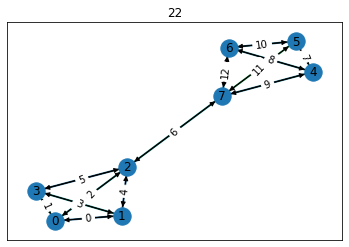

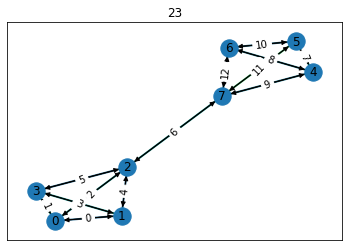

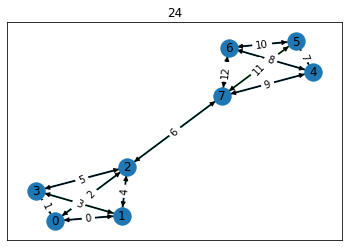

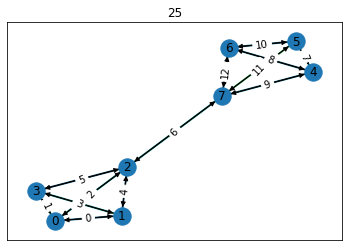

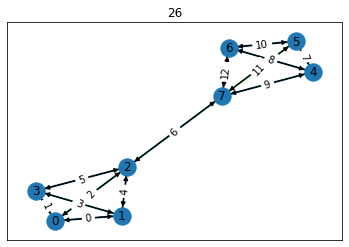

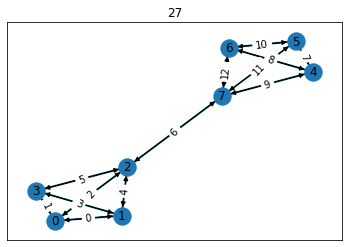

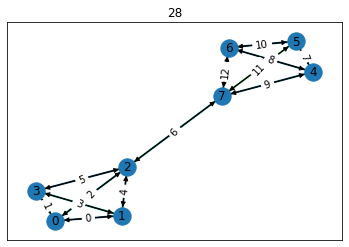

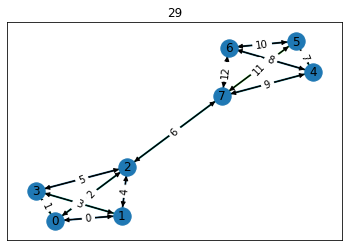

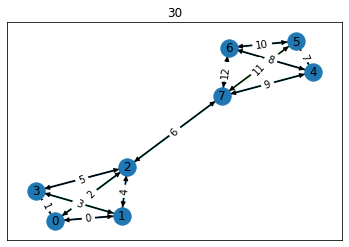

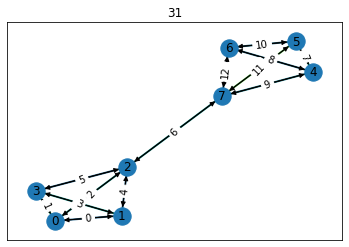

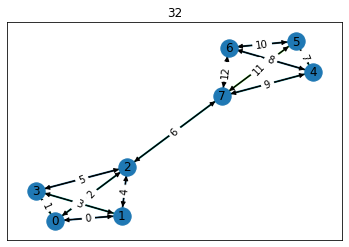

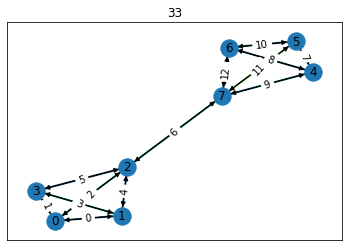

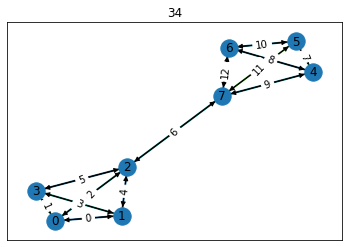

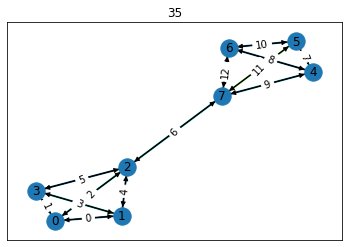

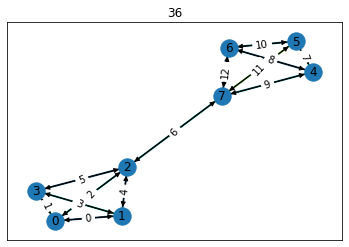

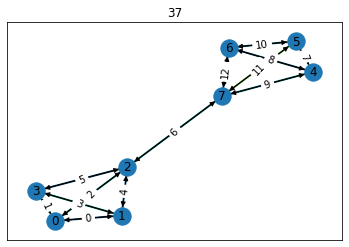

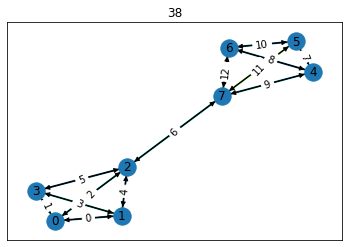

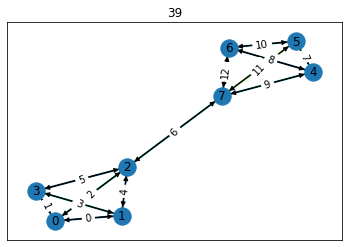

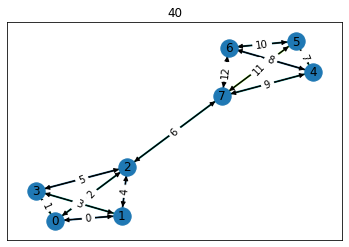

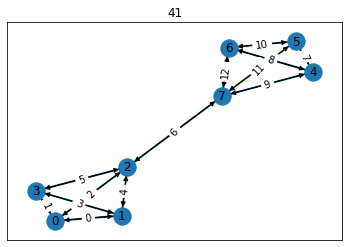

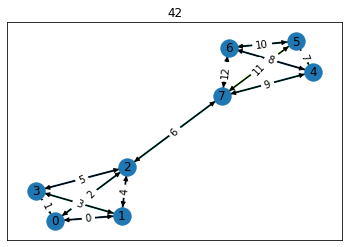

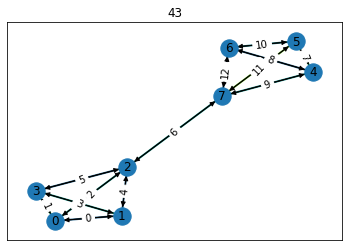

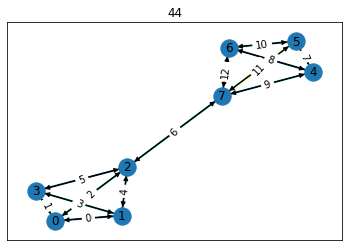

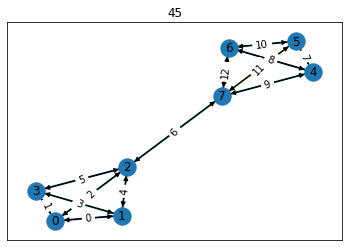

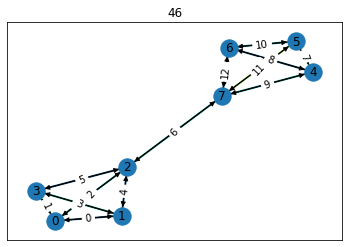

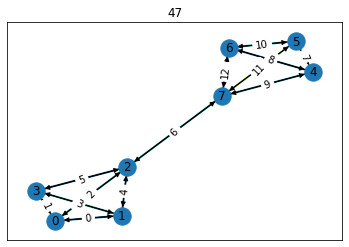

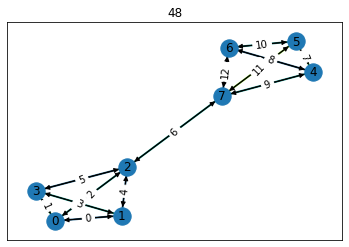

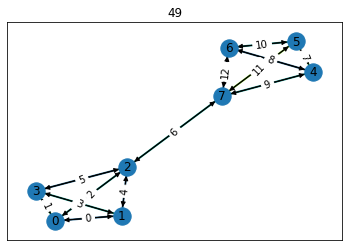

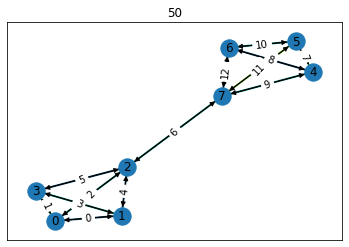

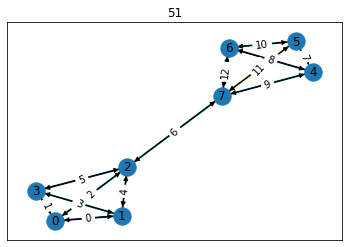

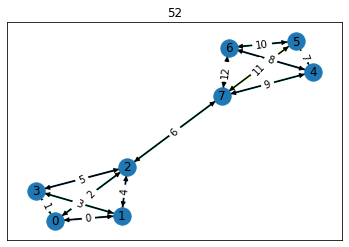

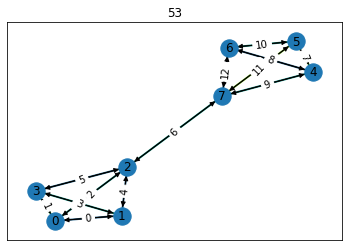

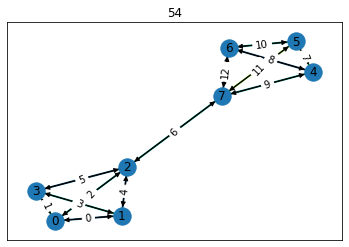

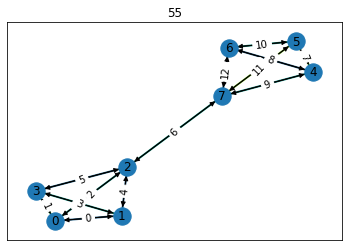

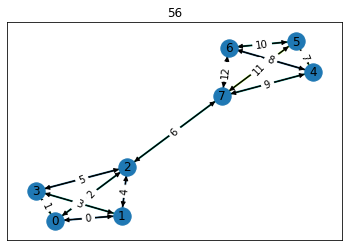

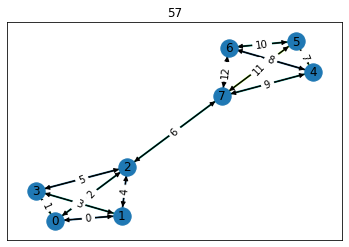

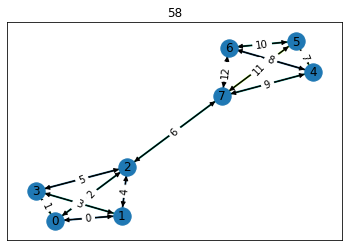

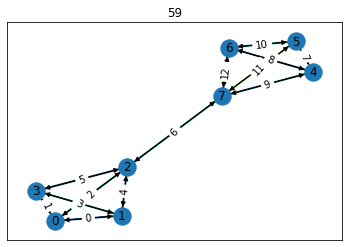

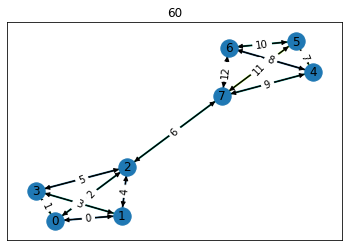

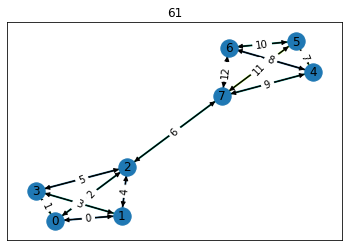

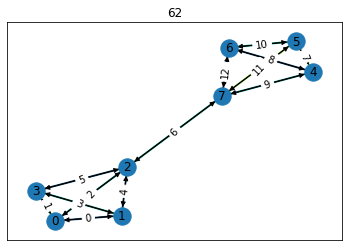

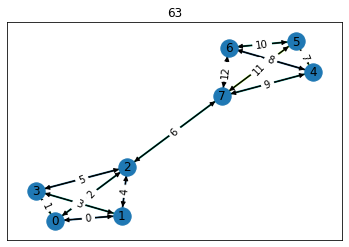

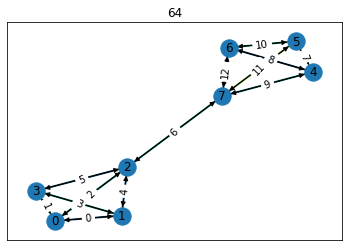

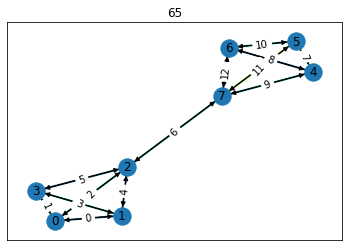

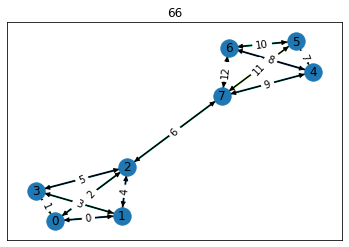

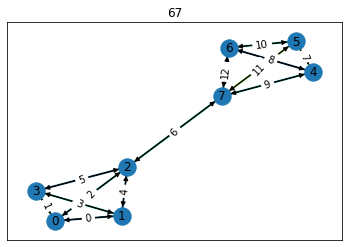

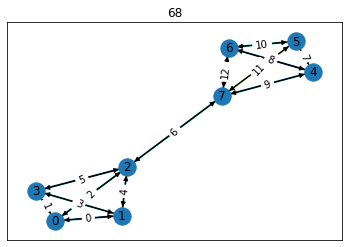

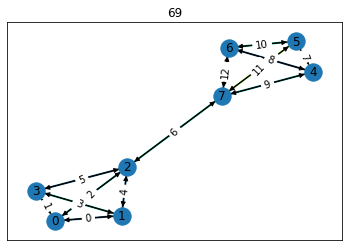

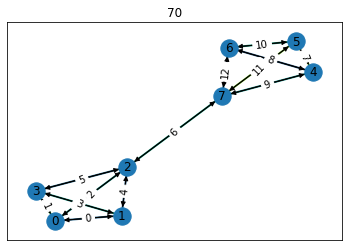

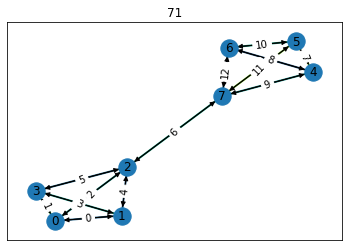

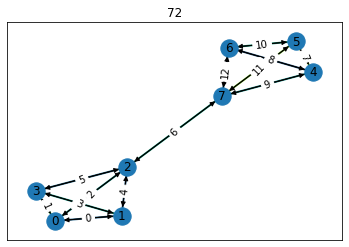

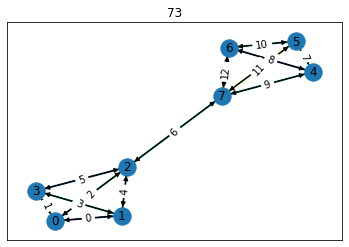

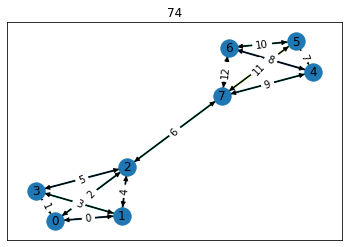

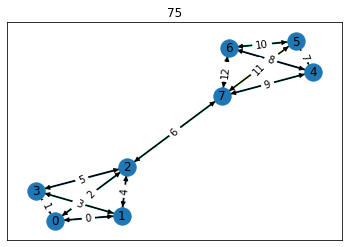

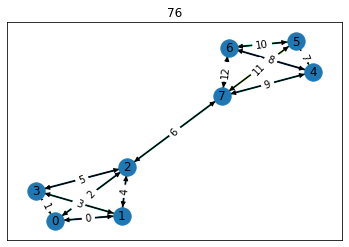

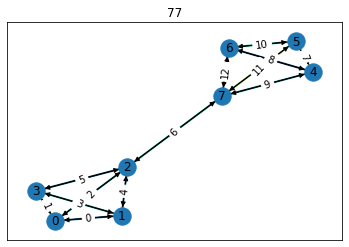

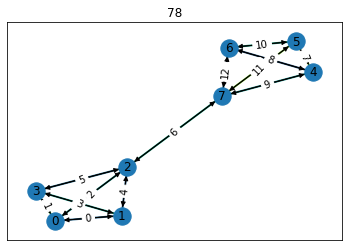

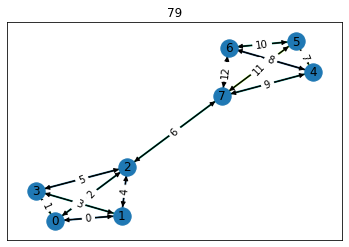

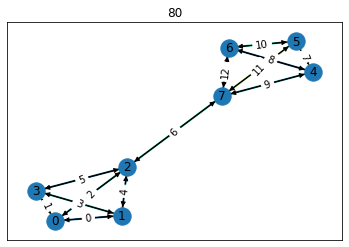

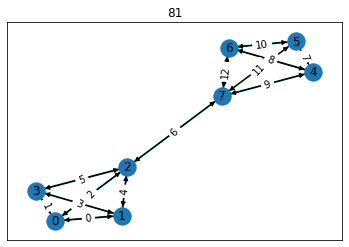

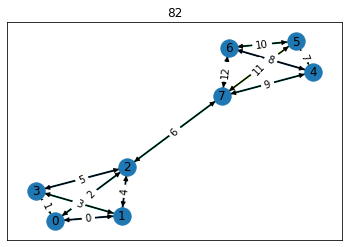

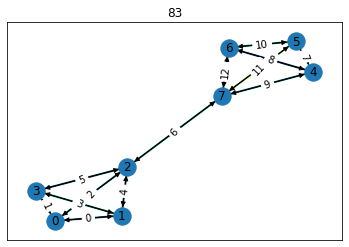

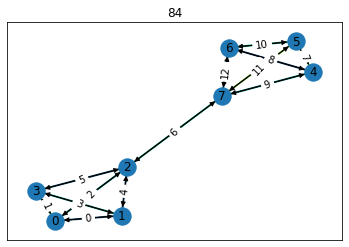

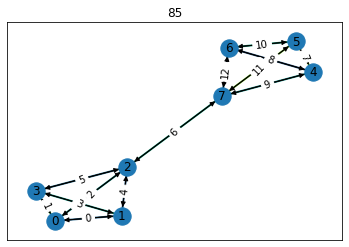

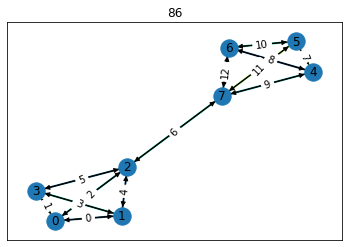

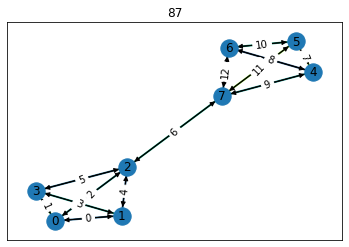

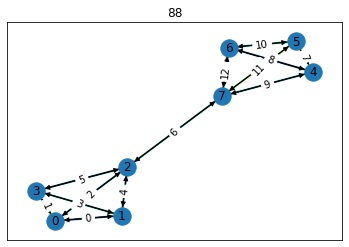

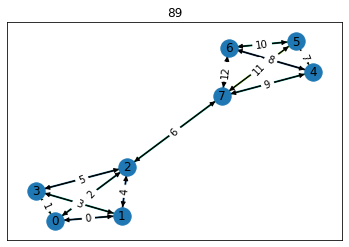

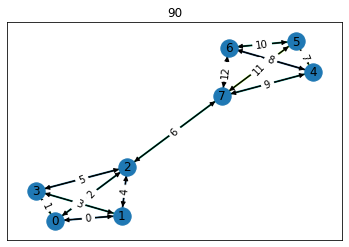

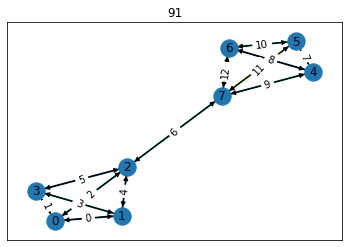

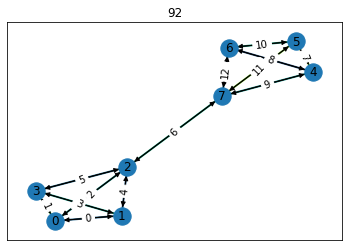

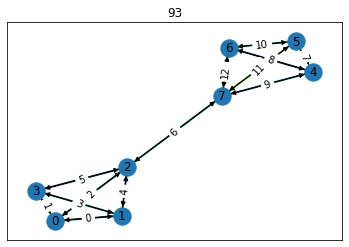

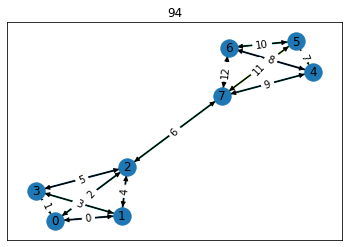

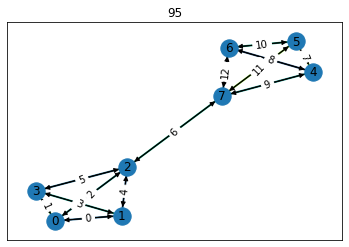

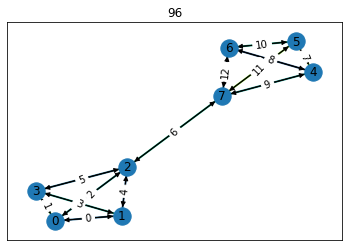

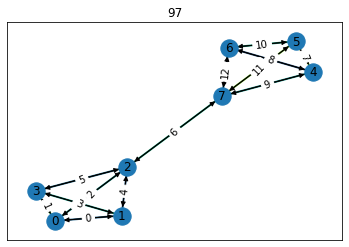

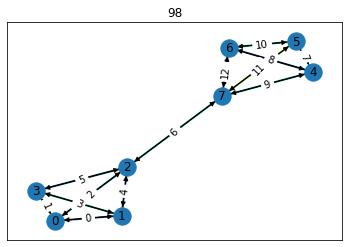

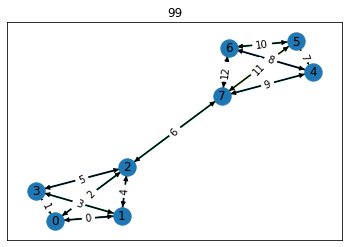

In [14]:
e = np.round(edge_result.y + np.pi, 2) % (2 * np.pi) - np.pi
for i in range(100):
    plt.figure()
    nx.draw_networkx_nodes(G, pos=pos)
    edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
    node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
    nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
    nx.draw_networkx_edges(G.to_directed(), pos=pos)#, edge_color=e[:,i],width=2, edge_vmin=-np.pi, edge_vmax=np.pi)
    nx.draw_networkx_edges(G, pos=pos, edge_color=e[:,i],width=2, edge_vmin=-np.pi, edge_vmax=np.pi)

    plt.title(i)


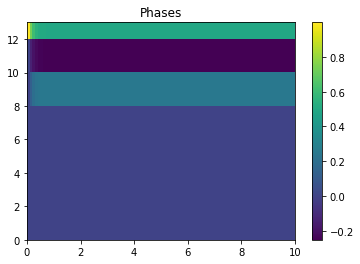

In [69]:
np.random.seed(4444)
initial_phase = np.random.uniform(0, 0.5, Gsc.n_edges)
initial_phase = np.zeros(Gsc.n_edges)
initial_phase[0] = 1
t_max = 10
n_t = 100
alpha_1=0
alpha_2 =0
#alpha_2=np.random.uniform(0, 2 * np.pi, Gsc.lifted_N1.shape[0]) # np.ones(Gsc.lifted_N1.shape[0])*np.pi

#initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
#edge_result.y = Gsc.V.T.dot(edge_result.y)
#from copy import copy
#e = copy(edge_result)
#e.y = -edge_result.y[13:]

#plot_edge_kuramoto(e)

#e.y = edge_result.y[:13]

#plot_edge_kuramoto(e)
#edge_result.y = Gsc.V.T.dot(edge_result.y)
plot_edge_kuramoto(edge_result)


<function matplotlib.pyplot.show(close=None, block=None)>

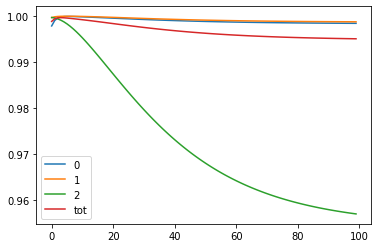

In [16]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','1','2','tot'])
plt.show

## Two cliques one hole

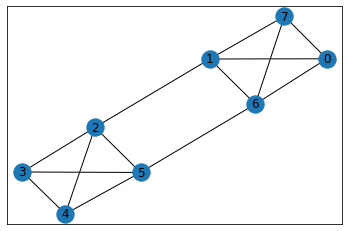

In [28]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(6,7,weight=1,edge_com=0)
G.add_edge(7,0,weight=1,edge_com=0)
G.add_edge(0,6,weight=1,edge_com=0)
G.add_edge(1,7,weight=1,edge_com=0)

G.add_edge(1,6,weight=1,edge_com=2)

G.add_edge(2,3,weight=1,edge_com=1)
G.add_edge(3,4,weight=1,edge_com=1)
G.add_edge(4,5,weight=1,edge_com=1)
G.add_edge(2,4,weight=1,edge_com=1)
G.add_edge(3,5,weight=1,edge_com=1)

G.add_edge(2,5,weight=1,edge_com=2)

G.add_edge(1,2,weight=1,edge_com=2)
G.add_edge(5,6,weight=1,edge_com=2)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,1,1,1,1,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))



Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

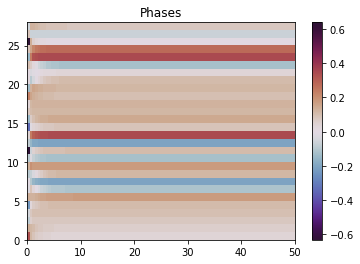

In [37]:
# np.random.seed(4444)
# initial_phase = np.random.uniform(0, np.pi, Gsc.n_edges)
initial_phase = np.random.normal(0, 0.2, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0
#alpha_2=np.random.uniform(0, 2 * np.pi, Gsc.lifted_N1.shape[0]) # np.ones(Gsc.lifted_N1.shape[0])*np.pi

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

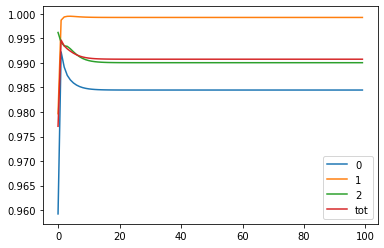

In [38]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','1','2','tot'])
plt.show

0.041947055091548294
[ 0.44991613 -0.08697667 -0.4150327  -0.09507574  0.16183087  0.17399749
 -0.11833176 -0.03779514  0.08642505  0.13062523 -0.04191773  0.16378073
  0.17433709  0.21177173 -0.28490324]
(15,)


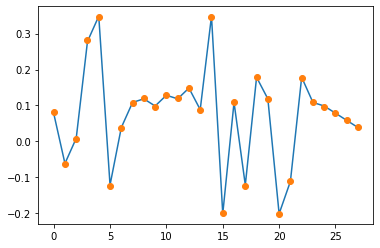

In [39]:
theta=np.round(edge_result.y[:,-1] + np.pi, 2) % (2 * np.pi) - np.pi
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.lifted_L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
# plt.legend('state','reconstructed in null-space')
plt.show()

## No hole square

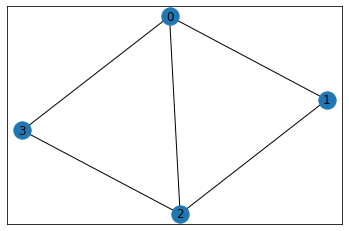

In [17]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)
G.add_edge(0,2,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,7,8).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

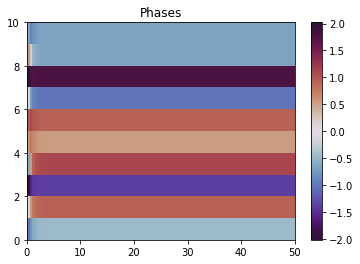

In [18]:
initial_phase = np.random.uniform(0, 1, Gsc.n_edges)
initial_phase = np.random.normal(0, 2, Gsc.n_edges)

t_max = 50
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*0
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

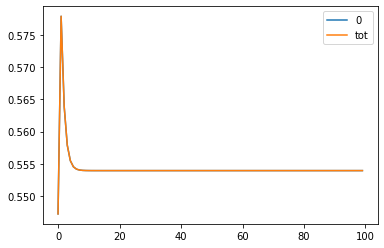

In [19]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','tot'])
plt.show

## One hole square

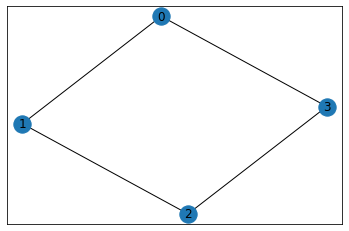

In [40]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,3,4).astype(int)),[0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

plt.figure()
nx.draw_networkx(G)
plt.show()

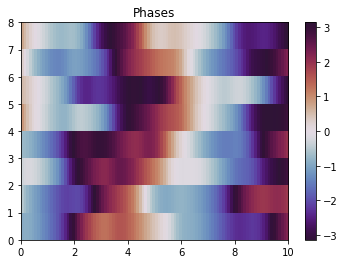

In [41]:
initial_phase = np.random.uniform(0, 1, Gsc.n_edges)
# initial_phase = np.random.normal(0, 2, Gsc.n_edges)

t_max = 10
n_t = 100
alpha_1=np.ones(Gsc.lifted_N1.shape[1])*1
alpha_2 =np.ones(Gsc.lifted_N1.shape[0])*0

initial_phase = np.hstack([initial_phase,-initial_phase])

edge_result = integrate_edge_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_1=alpha_1,alpha_2=alpha_2)
plot_edge_kuramoto(edge_result)

<function matplotlib.pyplot.show(close=None, block=None)>

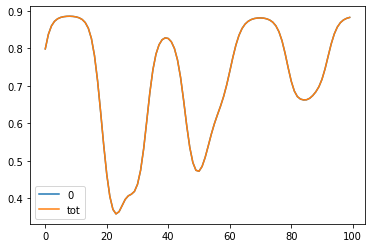

In [42]:
op=module_order_parameter(edge_result.y,np.hstack([edge_community_assignment,edge_community_assignment]))
plt.figure()
plt.plot(op.T)
# plt.ylim([0,1])
plt.legend(['0','tot'])
plt.show

9.976370614359174
[-0.57585388  2.39582114 -2.24185936  3.37105617  3.9903346 ]
(5,)


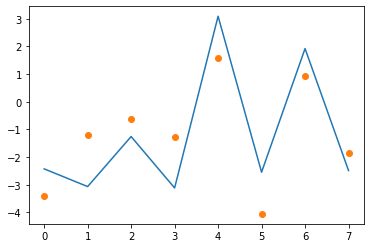

29.691362771568635
[-9.06284607]
(1,)


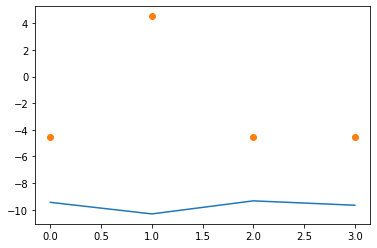

In [45]:
theta=np.round(edge_result.y[:,-10] + np.pi, 2) % (2 * np.pi) - np.pi
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.lifted_L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
# plt.legend('final state','reconstructed in null-space')
plt.show()

theta=edge_result.y[0:4,-1]
error,theta_hat,coeff,dim=is_in_subspace(theta,Gsc.L1)
print(error)
print(coeff)
print(dim)

plt.figure()
plt.plot(theta)
plt.plot(theta_hat,'o')
plt.show()

[ 4.00000000e+00 -2.22044605e-16  2.00000000e+00  2.00000000e+00]


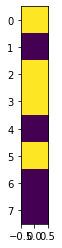

[ 4.00000000e+00 -1.43131458e-16 -1.43131458e-16  2.00000000e+00
  2.00000000e+00  2.45553755e-16 -1.23319933e-16 -1.23319933e-16]


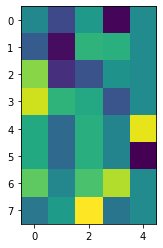

In [122]:
print(np.linalg.eigvals(Gsc.L1.todense()))

plt.figure()
plt.imshow(Gsc.V.dot(sc.linalg.null_space(Gsc.L1.todense())))
plt.show()

print(np.real(np.linalg.eigvals(Gsc.lifted_L1.todense())))

plt.figure()
plt.imshow(np.real(sc.linalg.null_space(Gsc.lifted_L1.todense())))
plt.title('')
plt.show()